In [70]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [71]:
df = pd.read_csv('https://raw.githubusercontent.com/EvaW01/schulich_data_science_Xinyue-Wang/main/MBAN6120/train.csv',sep=";")

In [72]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [73]:
counts = (df['pdays'] != -1).sum()
counts

8257

In [74]:
# Using np.where to create new columns
df['contacted_before'] = np.where(df['pdays'] == -1, 'no', 'yes')
df = df.drop(columns=['pdays'])

df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y,contacted_before
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,unknown,no,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,unknown,no,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,unknown,no,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,unknown,no,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,unknown,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,0,unknown,yes,no
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,0,unknown,yes,no
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,3,success,yes,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,0,unknown,no,no


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               45211 non-null  int64 
 1   job               45211 non-null  object
 2   marital           45211 non-null  object
 3   education         45211 non-null  object
 4   default           45211 non-null  object
 5   balance           45211 non-null  int64 
 6   housing           45211 non-null  object
 7   loan              45211 non-null  object
 8   contact           45211 non-null  object
 9   day               45211 non-null  int64 
 10  month             45211 non-null  object
 11  duration          45211 non-null  int64 
 12  campaign          45211 non-null  int64 
 13  previous          45211 non-null  int64 
 14  poutcome          45211 non-null  object
 15  y                 45211 non-null  object
 16  contacted_before  45211 non-null  object
dtypes: int64(6),

# Part 1: Data Preprocessing 

## EDA

In [76]:
# check missing value
missing_values = df.isnull().sum()
print(missing_values)

age                 0
job                 0
marital             0
education           0
default             0
balance             0
housing             0
loan                0
contact             0
day                 0
month               0
duration            0
campaign            0
previous            0
poutcome            0
y                   0
contacted_before    0
dtype: int64


### Basic Statistics

In [77]:
# Summary statistics for numerical columns
df.describe()

,age,balance,day,duration,campaign,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,275.000000


In [78]:
# Summary statistics for categorical columns
df.describe(include=['object'])

,job,marital,education,default,housing,loan,contact,month,poutcome,y,contacted_before
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922,36954


### Visualize Distributions

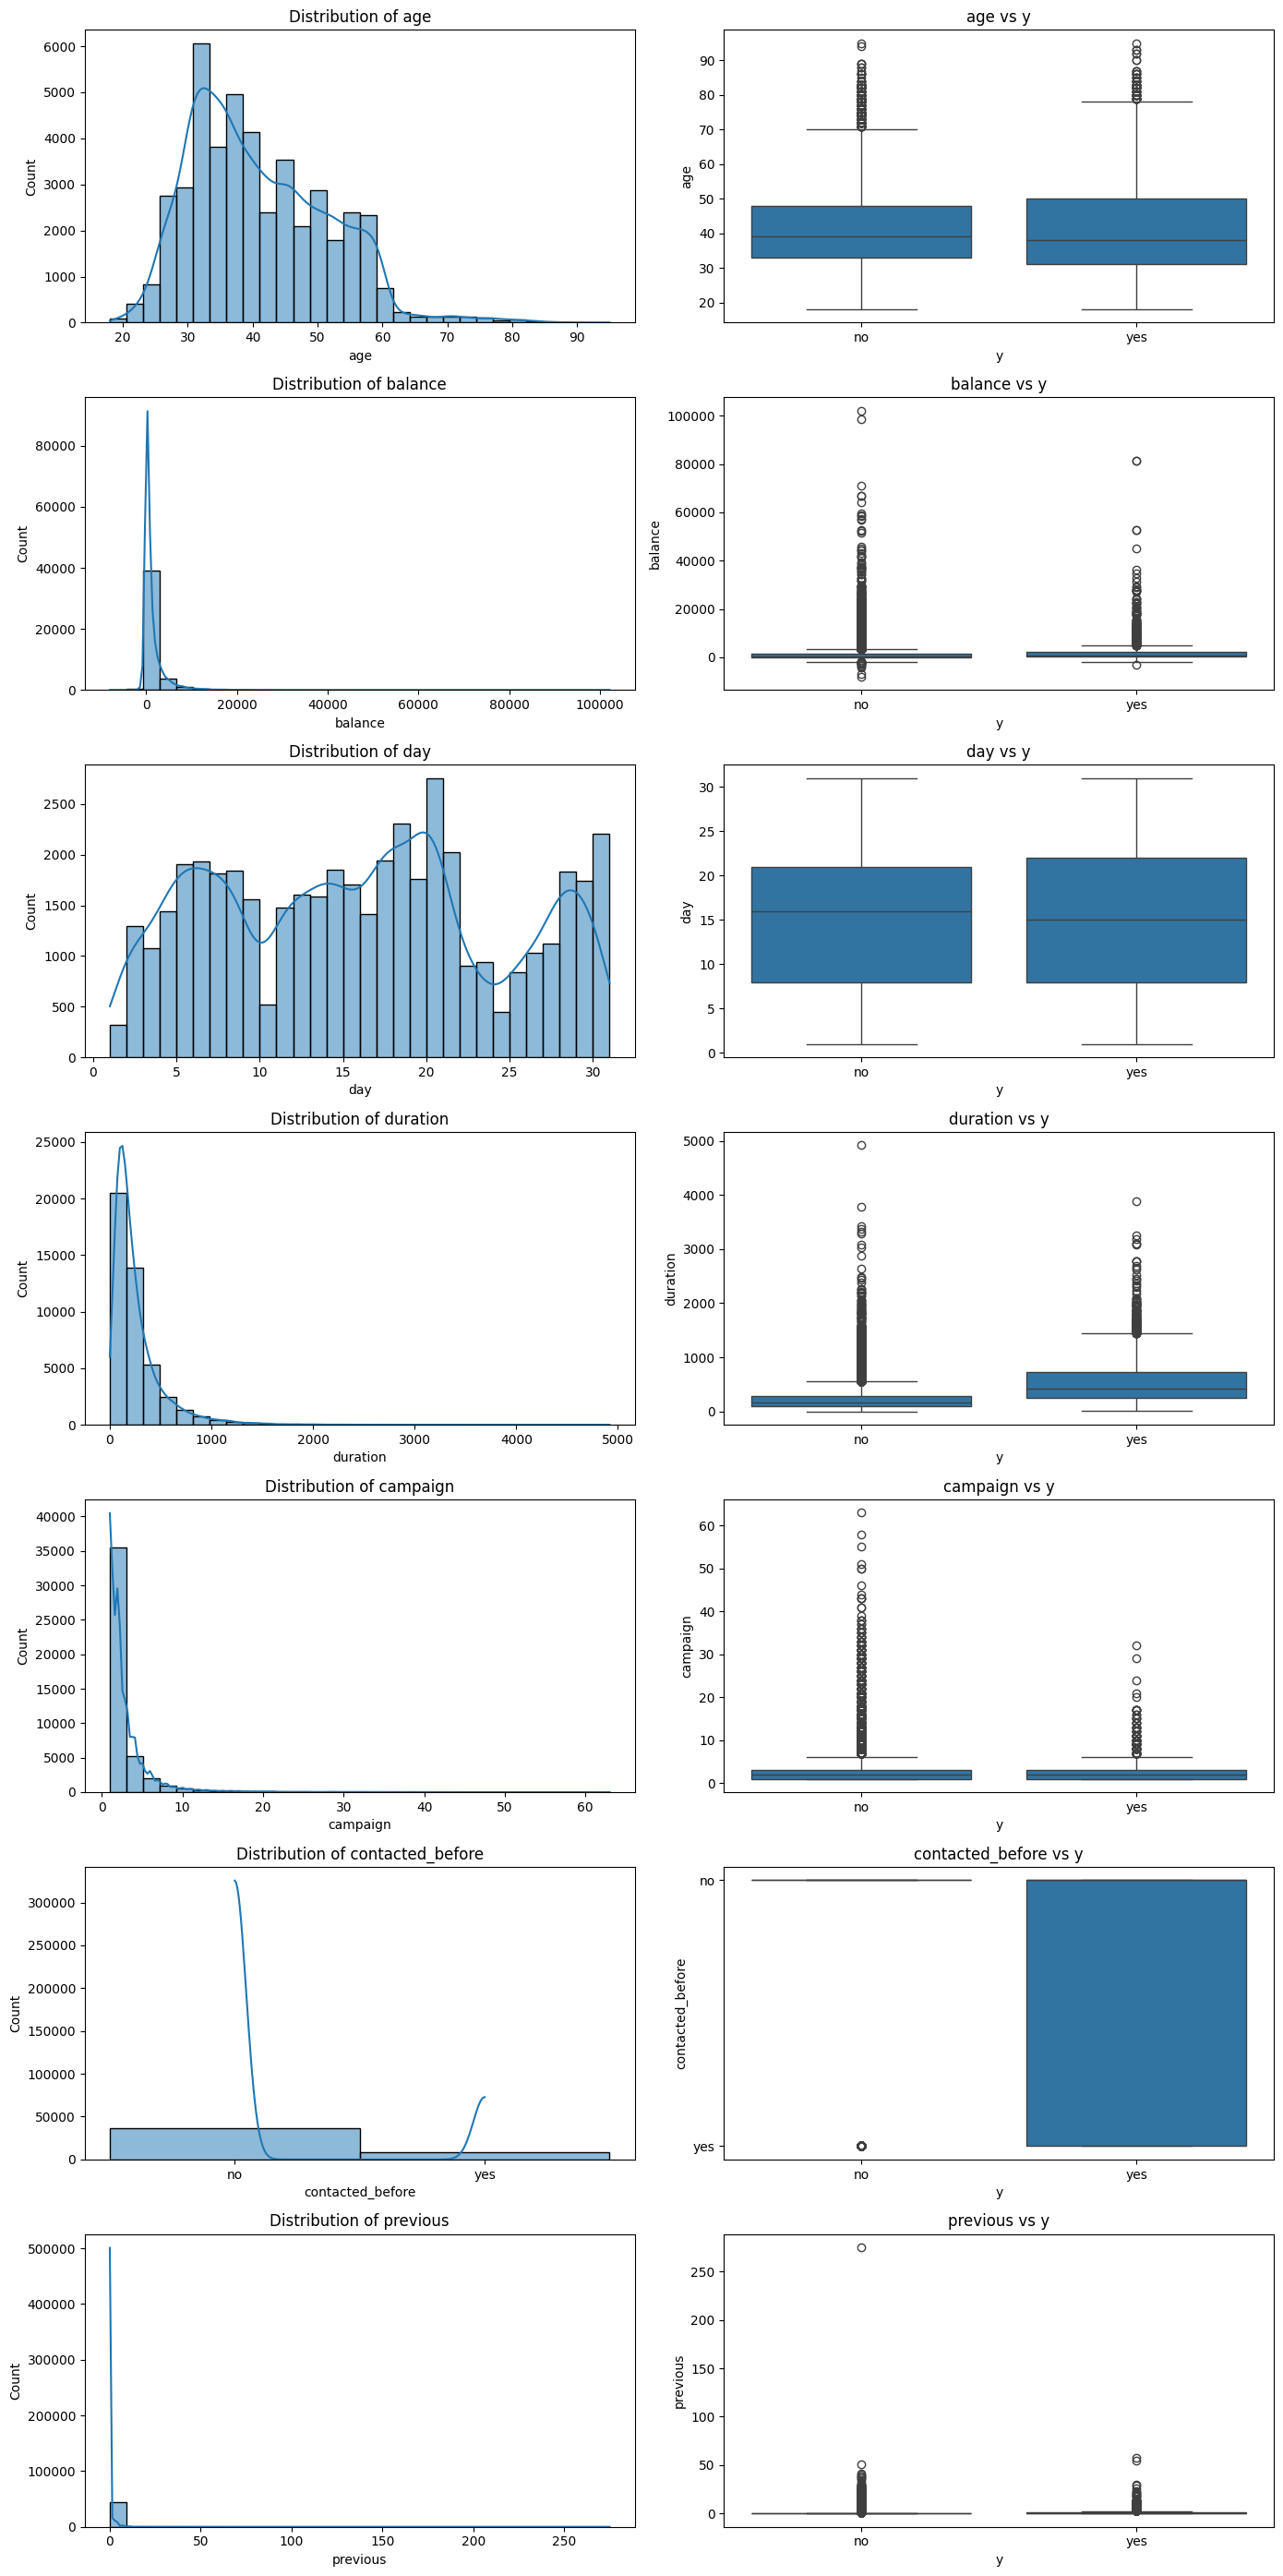

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical features
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'contacted_before','previous']

# Create histograms and box plots
fig, axes = plt.subplots(len(numerical_features), 2, figsize=(14, 28))

for i, feature in enumerate(numerical_features):
    # Histogram for the feature
    sns.histplot(df[feature], bins=30, ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Distribution of {feature}')

    # Box plot to show relationship with target variable 'y'
    sns.boxplot(x='y', y=feature, data=df, ax=axes[i, 1])
    axes[i, 1].set_title(f'{feature} vs y')

plt.tight_layout()
plt.show()


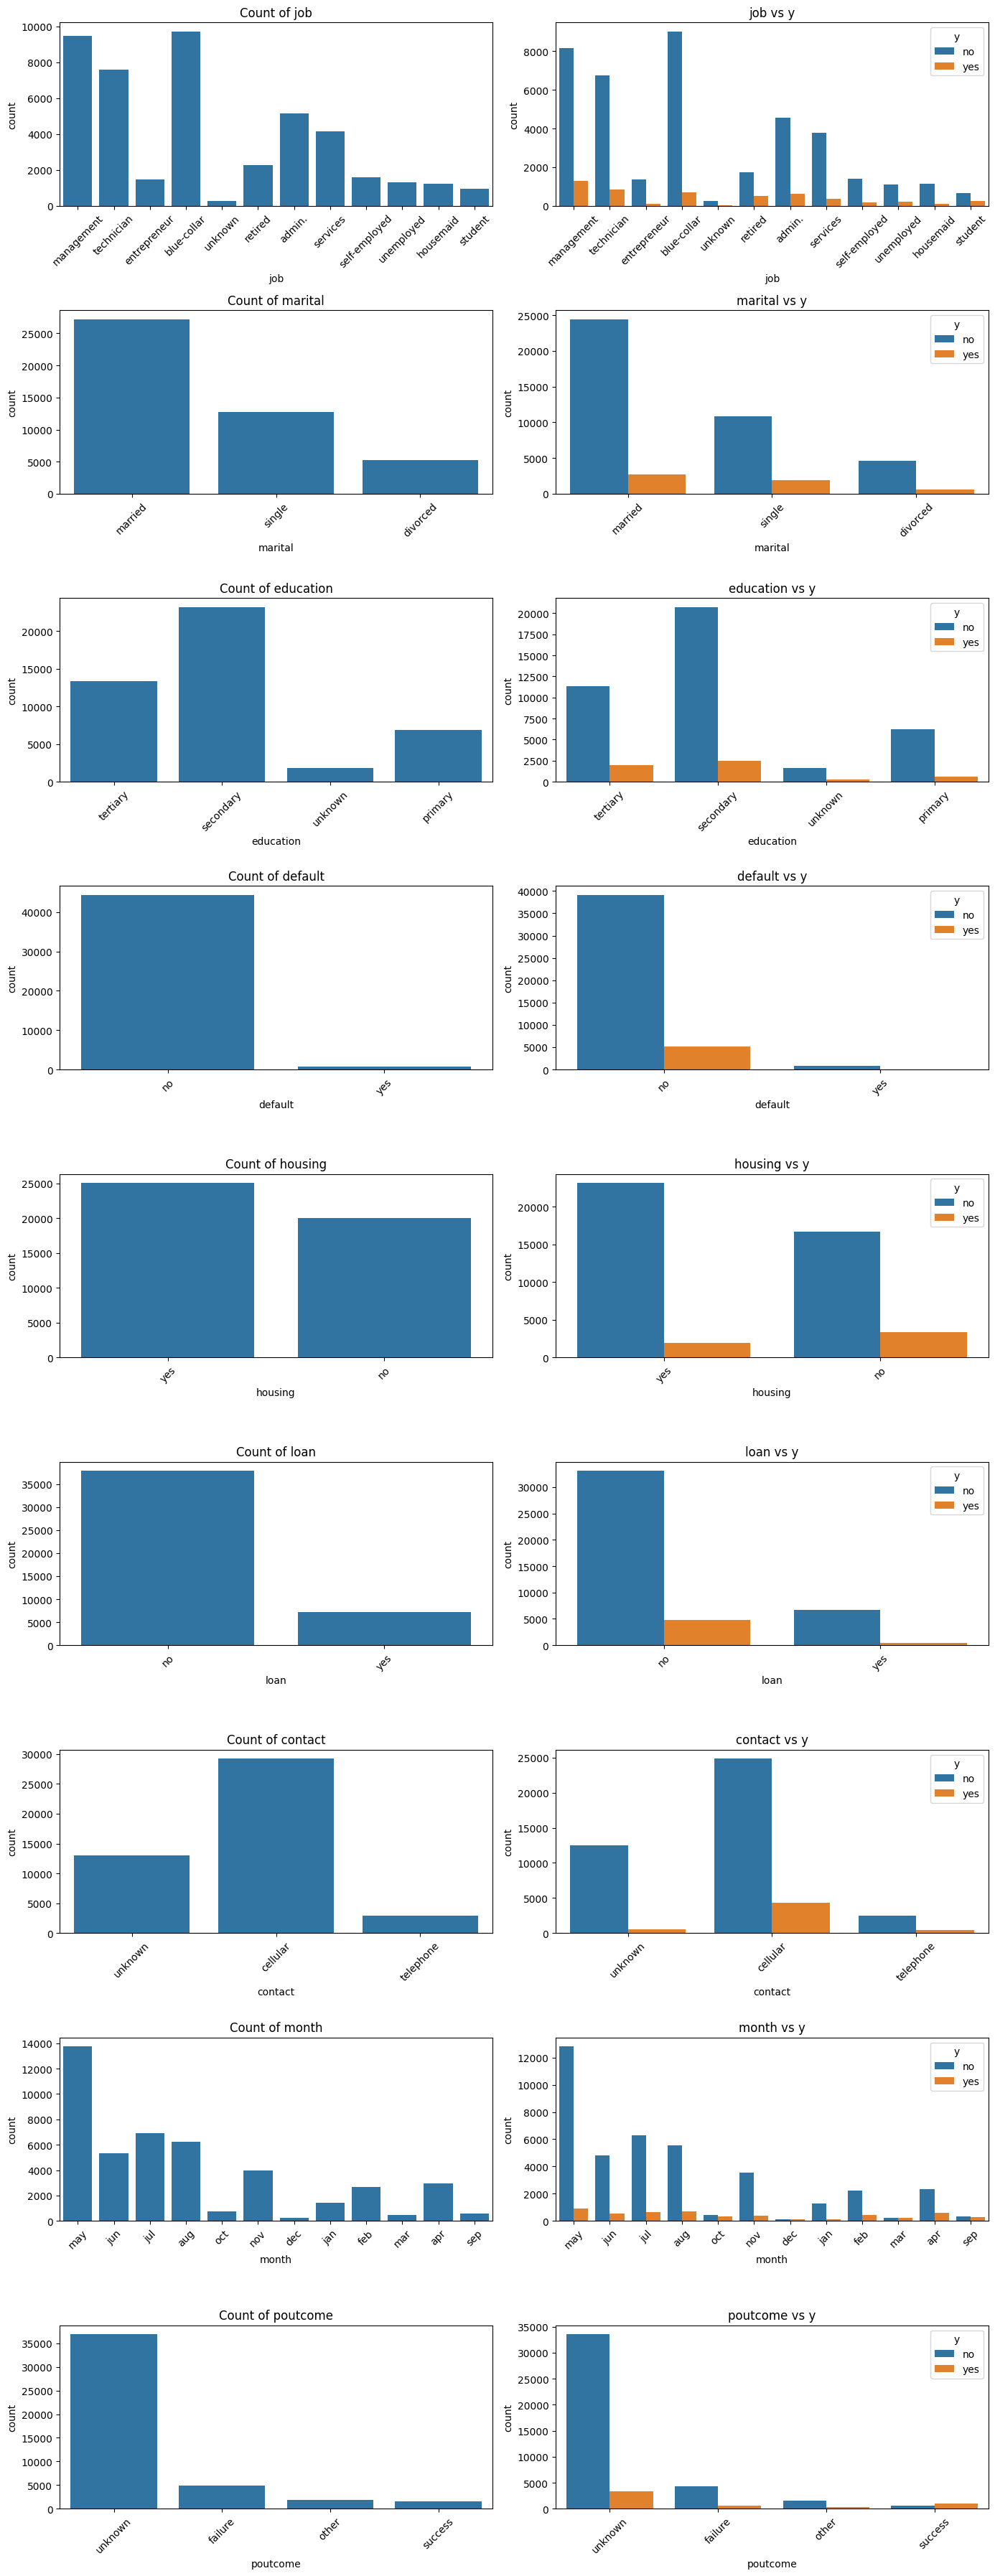

In [94]:
# List of categorical features
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Create bar plots
fig, axes = plt.subplots(len(categorical_features), 2, figsize=(14, 36))

for i, feature in enumerate(categorical_features):
    # Bar plot for the feature
    sns.countplot(x=feature, data=df, ax=axes[i, 0])
    axes[i, 0].set_title(f'Count of {feature}')
    axes[i, 0].tick_params(axis='x', rotation=45)
    
    # Bar plot to show relationship with target variable 'y'
    sns.countplot(x=feature, hue='y', data=df, ax=axes[i, 1])
    axes[i, 1].set_title(f'{feature} vs y')
    axes[i, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [81]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'previous',
       'poutcome', 'y', 'contacted_before'],
      dtype='object')

In [82]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [83]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [84]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [85]:
df['default'].unique()

array(['no', 'yes'], dtype=object)

In [95]:
# Get all categorical variables (columns of object type)
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Remove the target variable 'y' and do not one-hot encode it
categorical_columns.remove('y')

# One-hot encode all categorical variables using pandas.get_dummies
model = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# View the encoded data
model.head()


,age,balance,day,duration,campaign,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,contacted_before_yes
0,58,2143,5,261,1,0,no,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,44,29,5,151,1,0,no,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,33,2,5,76,1,0,no,False,True,False,...,False,False,True,False,False,False,False,False,True,False
3,47,1506,5,92,1,0,no,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,33,1,5,198,1,0,no,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [97]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   age                   45211 non-null  int64 
 1   balance               45211 non-null  int64 
 2   day                   45211 non-null  int64 
 3   duration              45211 non-null  int64 
 4   campaign              45211 non-null  int64 
 5   previous              45211 non-null  int64 
 6   y                     45211 non-null  object
 7   job_blue-collar       45211 non-null  bool  
 8   job_entrepreneur      45211 non-null  bool  
 9   job_housemaid         45211 non-null  bool  
 10  job_management        45211 non-null  bool  
 11  job_retired           45211 non-null  bool  
 12  job_self-employed     45211 non-null  bool  
 13  job_services          45211 non-null  bool  
 14  job_student           45211 non-null  bool  
 15  job_technician        45211 non-null

In [98]:
model.describe()

,age,balance,day,duration,campaign,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,275.000000


In [99]:
model.describe(include=['bool'])

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,contacted_before_yes
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,...,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
freq,35479,43724,43971,35753,42947,43632,41057,44273,37614,43908,...,39870,44734,31445,41241,44473,44632,43371,43700,36959,36954


In [100]:
model.describe(include=['object'])

,y
count,45211
unique,2
top,no
freq,39922


# Part 2: Build Baseline Models 

### Prepare the Data

In [101]:
# Split the data into features (X) and target (y)
X = df_encoded_full.drop('y', axis=1)  # Assuming 'y' is the target column after encoding
y = df_encoded_full['y'].map({'no': 0, 'yes': 1})  # Encode 'y' as 0 and 1

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


### Train Baseline Models

In [102]:
# Initialize models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
knn = KNeighborsClassifier()

# Train Logistic Regression
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Train k-NN
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluate baseline models
print("Logistic Regression - Baseline")
print(classification_report(y_test, y_pred_log_reg))
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("ROC-AUC:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]))

print("\nk-NN - Baseline")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("ROC-AUC:", roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1]))


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Baseline
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11977
           1       1.00      1.00      1.00      1587

    accuracy                           1.00     13564
   macro avg       1.00      1.00      1.00     13564
weighted avg       1.00      1.00      1.00     13564

Accuracy: 1.0
ROC-AUC: 1.0

k-NN - Baseline
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     11977
           1       0.48      0.28      0.35      1587

    accuracy                           0.88     13564
   macro avg       0.69      0.62      0.64     13564
weighted avg       0.86      0.88      0.87     13564

Accuracy: 0.8803450309643173
ROC-AUC: 0.7593890969032802


### Hyperparameter Tuning

In [103]:
# Logistic Regression hyperparameter tuning
log_reg_param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
log_reg_grid = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), log_reg_param_grid, cv=5, scoring='roc_auc')
log_reg_grid.fit(X_train, y_train)

# k-NN hyperparameter tuning
knn_param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='roc_auc')
knn_grid.fit(X_train, y_train)

# Best hyperparameters and scores
print("Best Logistic Regression Parameters:", log_reg_grid.best_params_)
print("Best Logistic Regression ROC-AUC:", log_reg_grid.best_score_)

print("\nBest k-NN Parameters:", knn_grid.best_params_)
print("Best k-NN ROC-AUC:", knn_grid.best_score_)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

Best Logistic Regression Parameters: {'C': 1}
Best Logistic Regression ROC-AUC: 1.0

Best k-NN Parameters: {'n_neighbors': 9, 'weights': 'distance'}
Best k-NN ROC-AUC: 0.7983913746783482


###  Evaluate Tuned Models

In [104]:
# Predict using the best models
y_pred_log_reg_tuned = log_reg_grid.predict(X_test)
y_pred_knn_tuned = knn_grid.predict(X_test)

# Evaluate tuned models
print("\nLogistic Regression - Tuned")
print(classification_report(y_test, y_pred_log_reg_tuned))
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg_tuned))
print("ROC-AUC:", roc_auc_score(y_test, log_reg_grid.predict_proba(X_test)[:, 1]))

print("\nk-NN - Tuned")
print(classification_report(y_test, y_pred_knn_tuned))
print("Accuracy:", accuracy_score(y_test, y_pred_knn_tuned))
print("ROC-AUC:", roc_auc_score(y_test, knn_grid.predict_proba(X_test)[:, 1]))



Logistic Regression - Tuned
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11977
           1       1.00      1.00      1.00      1587

    accuracy                           1.00     13564
   macro avg       1.00      1.00      1.00     13564
weighted avg       1.00      1.00      1.00     13564

Accuracy: 1.0
ROC-AUC: 1.0

k-NN - Tuned
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     11977
           1       0.51      0.25      0.34      1587

    accuracy                           0.88     13564
   macro avg       0.71      0.61      0.64     13564
weighted avg       0.86      0.88      0.87     13564

Accuracy: 0.8836626363904453
ROC-AUC: 0.7883414856420615
